### A notebook for data analysis of the sensitivity analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Specify the experiment wanted
value_to_vary_name = "preference-penalty-parking-outside-neighbourhood"
v = 0.4
replications = 12

# Read the pickle
series_df = pd.read_pickle(f'../results/sensitivity/sens_series_{value_to_vary_name}_{v}_{replications}r_df.pickle')
series_df.head()

,monthly-car-trips,monthly-shared-car-trips,monthly-public-transport-trips,monthly-bike-trips,count cars,shared-car-subscriptions,public-transport-subscriptions,mean-car-preference,monthly-car-trips,monthly-shared-car-trips,...,public-transport-subscriptions,mean-car-preference,monthly-car-trips,monthly-shared-car-trips,monthly-public-transport-trips,monthly-bike-trips,count cars,shared-car-subscriptions,public-transport-subscriptions,mean-car-preference
,0,0,0,0,0,0,0,0,1,1,...,10,10,11,11,11,11,11,11,11,11
0,0.0,0.0,0.0,0.0,1094.0,89.0,1295.0,0.412222,0.0,0.0,...,1284.0,0.409126,0.0,0.0,0.0,0.0,1111.0,105.0,1299.0,0.419879
1,24070.0,5.0,11402.0,12698.0,930.0,72.0,1212.0,0.407167,26048.0,14.0,...,1201.0,0.409181,25025.0,15.0,10678.0,12863.0,970.0,88.0,1218.0,0.417682
2,22044.0,3.0,13018.0,13239.0,831.0,62.0,1140.0,0.405313,24176.0,19.0,...,1141.0,0.409268,23542.0,12.0,11748.0,13354.0,857.0,77.0,1146.0,0.417333
3,20298.0,1.0,13965.0,14050.0,766.0,50.0,1079.0,0.404032,22068.0,8.0,...,1076.0,0.409150,21571.0,10.0,12839.0,14433.0,775.0,67.0,1073.0,0.417192
4,18935.0,0.0,14766.0,14753.0,707.0,42.0,1047.0,0.403134,20466.0,8.0,...,1058.0,0.408964,19630.0,12.0,13630.0,15562.0,714.0,55.0,1032.0,0.417217


<Axes: >

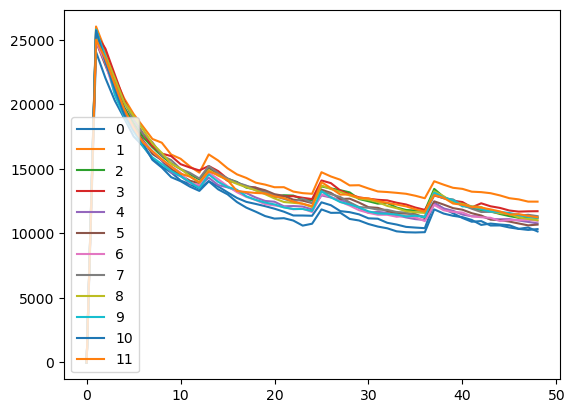

In [3]:
# Plot for one run all the variables
series_df["monthly-car-trips"].plot()

<Axes: >

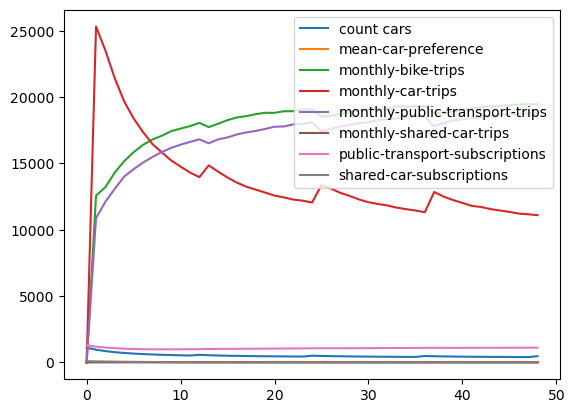

In [4]:
# Take the average of all the runs and plot those
series_df_agg = series_df.groupby(level=[0], axis="columns").mean()
series_df_agg.plot()

## Full sensitivity analysis

### Load data

In [5]:
modalities = ["car", "shared-car", "public-transport", "bike"]

KPIs = [
    *[f"monthly-{m}-trips" for m in modalities],
    "count cars",
    "shared-car-subscriptions",
    "public-transport-subscriptions",
    "mean-car-preference",
]

In [6]:
sens_design = pd.read_excel("../sensitivity-analysis-design.xlsx")
n_vars = len(sens_design.index)
vars = sens_design["Variable"].to_list()

In [7]:
reference = f'../results/sensitivity/sens_series_default_12r_df.pickle'

In [8]:
def create_df(abs=True, t=48):
    # Read all the pickles into a dictionary of dataframes
    dfs = {}

    if abs:
        dfs[("Reference", "Reference")] = pd.read_pickle(reference)

    for index, row in sens_design.iterrows():
        var = row["Variable"]
        low = row["Low"]
        mid = row["Default"]
        high = row["High"]

        if var not in ["initial-car-preference", "initial-public-transport-preference"]:
            replications = 12
        else:
            replications = 12

        # Define dict
        if abs:
            dfs[(var, "-20%")] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{low}_{replications}r_df.pickle')
            dfs[(var, "+20%")] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{high}_{replications}r_df.pickle')
        else:
            dfs[(var, low)] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{low}_{replications}r_df.pickle')
            dfs[(var, mid)] = pd.read_pickle(reference)
            dfs[(var, high)] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{high}_{replications}r_df.pickle')

    # Create a dictionary with the values of the last tick
    end_dict = {}
    for (k, v), df_t in dfs.items():
        end_dict[(k, v)] = df_t.iloc[t]

    # Create multi-indexed DataFrame from dict
    end_df = pd.DataFrame.from_dict(end_dict)

    return end_df

### Absolute ranges

In [9]:
abs_df = create_df(True)
abs_df

Reference  \
                                      Reference   
monthly-car-trips              0    7845.000000   
monthly-shared-car-trips       0       0.000000   
monthly-public-transport-trips 0   17055.000000   
monthly-bike-trips             0   24975.000000   
count cars                     0     391.000000   
...                                         ...   
monthly-bike-trips             11  23994.000000   
count cars                     11    353.000000   
shared-car-subscriptions       11      2.000000   
public-transport-subscriptions 11   1067.000000   
mean-car-preference            11      0.421812   

                                  subscription-monthly-buy-sell-chance  \
                                                                  -20%   
monthly-car-trips              0                          11480.000000   
monthly-shared-car-trips       0                              0.000000   
monthly-public-transport-trips 0                          19578.000000   
monthly-bike-trips             0                          19056.000000   
count cars                     0                            484.000000   
...                                                                ...   
monthly-bike-trips             11                         20816.000000   
count cars                     11                           457.000000   
shared-car-subscriptions       11                             4.000000   
public-transport-subscriptions 11                          1133.000000   
mean-car-preference            11                             0.399544   

                                                 \
                                           +20%   
monthly-car-trips              0    9551.000000   
monthly-shared-car-trips       0       2.000000   
monthly-public-transport-trips 0   19286.000000   
monthly-bike-trips             0   20022.000000   
count cars                     0     413.000000   
...                                         ...   
monthly-bike-trips             11  19925.000000   
count cars                     11    435.000000   
shared-car-subscriptions       11      0.000000   
public-transport-subscriptions 11   1156.000000   
mean-car-preference            11      0.404466   

                                  preference-penalty-parking-outside-neighbourhood  \
                                                                              -20%   
monthly-car-trips              0                                      10157.000000   
monthly-shared-car-trips       0                                          0.000000   
monthly-public-transport-trips 0                                      19523.000000   
monthly-bike-trips             0                                      19013.000000   
count cars                     0                                        464.000000   
...                                                                            ...   
monthly-bike-trips             11                                     19242.000000   
count cars                     11                                       485.000000   
shared-car-subscriptions       11                                         3.000000   
public-transport-subscriptions 11                                      1102.000000   
mean-car-preference            11                                         0.423426   

                                                mean-value-of-time  \
                                           +20%               -20%   
monthly-car-trips              0   10130.000000        7516.000000   
monthly-shared-car-trips       0       5.000000           0.000000   
monthly-public-transport-trips 0   18118.000000       11160.000000   
monthly-bike-trips             0   19525.000000       29922.000000   
count cars                     0     438.000000         387.000000   
...                                         ...                ...   
monthly-bike-trips             11  19962.000000       30388.000000  

In [10]:
KPIs_to_drop = []
KPIs2 = [k for k in KPIs if k not in KPIs_to_drop]

In [11]:
plot_df = {}
for k in KPIs2:
    plot_df[k] = abs_df.T[k].stack(level=0).reset_index()
    plot_df[k].columns = ["Variable", "Value", "Replication", "Result"]
plot_df[KPIs2[0]].head()

,Variable,Value,Replication,Result
0,Reference,Reference,0,7845.0
1,Reference,Reference,1,7511.0
2,Reference,Reference,2,7684.0
3,Reference,Reference,3,7888.0
4,Reference,Reference,4,6644.0


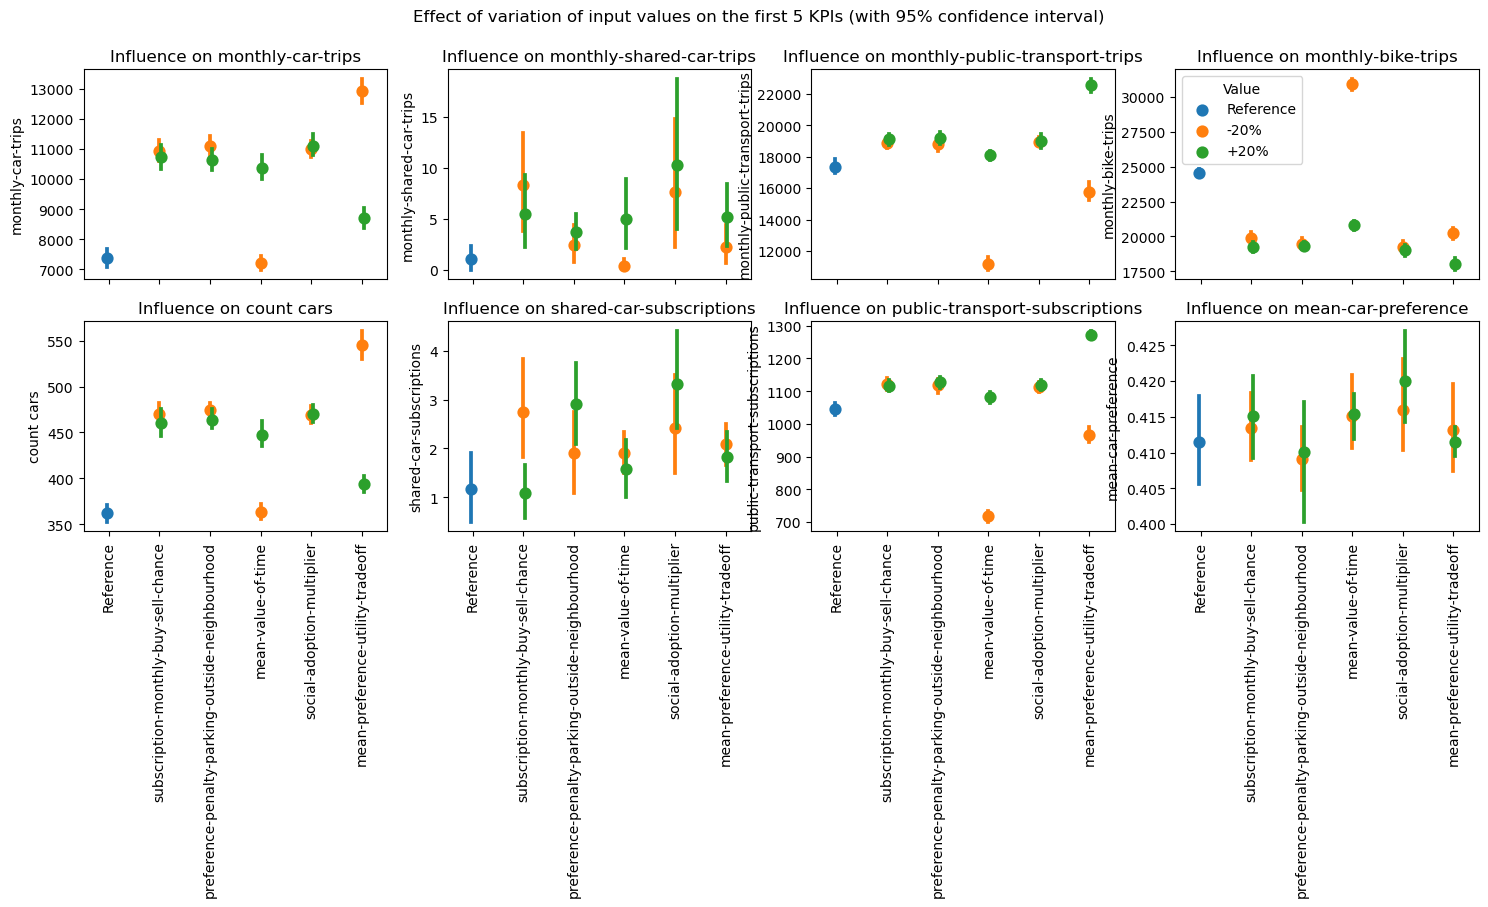

In [12]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(18,6)
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[:5] + ["Reference"])].copy()
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Value", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90,)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    g[KPI].set_ylabel(f"{KPI}")
    # Remove the legend except the fourth plot
    if i != 3:
        g[KPI].legend_.remove()
fig.suptitle("Effect of variation of input values on the first 5 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_abs_1.svg", bbox_inches="tight")

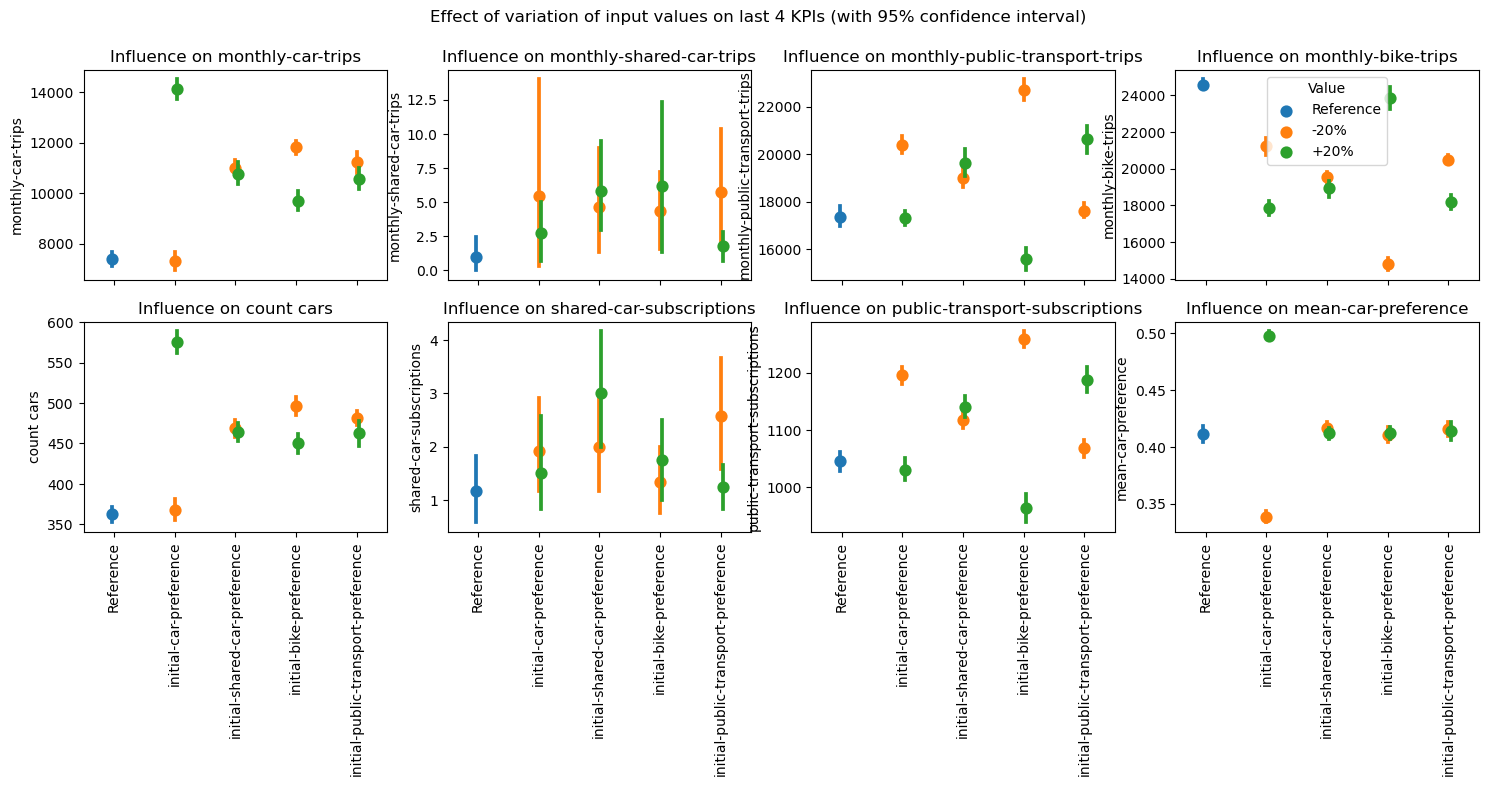

In [13]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(18,6)
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[5:] + ["Reference"])].copy()
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Value", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90,)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    g[KPI].set_ylabel(f"{KPI}")
    # Remove the legend except the fourth plot
    if i != 3:
        g[KPI].legend_.remove()
fig.suptitle("Effect of variation of input values on last 4 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_abs_2.svg", bbox_inches="tight")

### Normalize sensitivity

In [14]:
norm_df = create_df(False)

In [15]:
dev_df = pd.DataFrame(index=norm_df.index)
for var in sens_design["Variable"].to_list():
    # Get the reference column for that variable
    ref = norm_df[var].columns[1]
    # Transform the reference column to contain the mean of all replications for that variable
    ref_mean = norm_df[var][ref].groupby(level=0).transform('mean')

    # For each column, calculate the deviation
    for i, column in enumerate(norm_df[var].columns):
        if i != 1:
            ratio = column/ref
            dev_df[var, ratio] = (norm_df[var][column] - ref_mean) / norm_df[var][ref]
dev_df.columns = pd.MultiIndex.from_tuples(dev_df.columns)
dev_df.T

monthly-car-trips  \
                                                                    0    
subscription-monthly-buy-sell-chance             0.8          0.522371   
                                                 1.2          0.276482   
preference-penalty-parking-outside-neighbourhood 0.8          0.353728   
                                                 1.2          0.350287   
mean-value-of-time                               0.8          0.017081   
                                                 1.2          0.567368   
social-adoption-multiplier                       0.8          0.510134   
                                                 1.2          0.518419   
mean-preference-utility-tradeoff                 0.9          0.742001   
                                                 1.1          0.042830   
initial-car-preference                           0.8         -0.084895   
                                                 1.2          0.900446   
initial-shared-car-preference                    0.8          0.518419   
                                                 1.2          0.450096   
initial-bike-preference                          0.8          0.527087   
                                                 1.2          0.262333   
initial-public-transport-preference              0.8          0.323901   
                                                 1.2          0.479159   

                                                     monthly-shared-car-trips  \
                                                                           0    
subscription-monthly-buy-sell-chance             0.8                     -inf   
                                                 1.2                      inf   
preference-penalty-parking-outside-neighbourhood 0.8                     -inf   
                                                 1.2                      inf   
mean-value-of-time                               0.8                     -inf   
                                                 1.2                     -inf   
social-adoption-multiplier                       0.8                      inf   
                                                 1.2                      inf   
mean-preference-utility-tradeoff                 0.9                     -inf   
                                                 1.1                      inf   
initial-car-preference                           0.8                     -inf   
                                                 1.2                      inf   
initial-shared-car-preference                    0.8                     -inf   
                                                 1.2                      inf   
initial-bike-preference                          0.8                     -inf   
                                                 1.2                      inf   
initial-public-transport-preference              0.8                     -inf   
                                                 1.2                      inf   

                                                     monthly-public-transport-trips  \
                                                                                 0    
subscription-monthly-buy-sell-chance             0.8                       0.129786   
                                                 1.2                       0.112665   
preference-penalty-parking-outside-neighbourhood 0.8                       0.126561   
                                                 1.2                       0.044181   
mean-value-of-time                               0.8                      -0.363794   
                                                 1.2                       0.050806   
social-adoption-multiplier                       0.8                       0.140457   
                                                 1.2                       0.065347   
mean-preference-utility-tradeoff                 0.9                      -0.0912

In [16]:
plot_df = {}
for k in KPIs2:
    plot_df[k] = dev_df.T[k].stack(level=0).reset_index()
    plot_df[k].columns = ["Variable", "Deviation", "Replication", "Result"]
    plot_df[k]["Deviation"] = plot_df[k]["Deviation"].round(2)
plot_df[KPIs2[0]].head()

,Variable,Deviation,Replication,Result
0,subscription-monthly-buy-sell-chance,0.8,0,0.522371
1,subscription-monthly-buy-sell-chance,0.8,1,0.360405
2,subscription-monthly-buy-sell-chance,0.8,2,0.662546
3,subscription-monthly-buy-sell-chance,0.8,3,0.405933
4,subscription-monthly-buy-sell-chance,0.8,4,0.420229


C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\lib\function_base.py:4575: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\core\

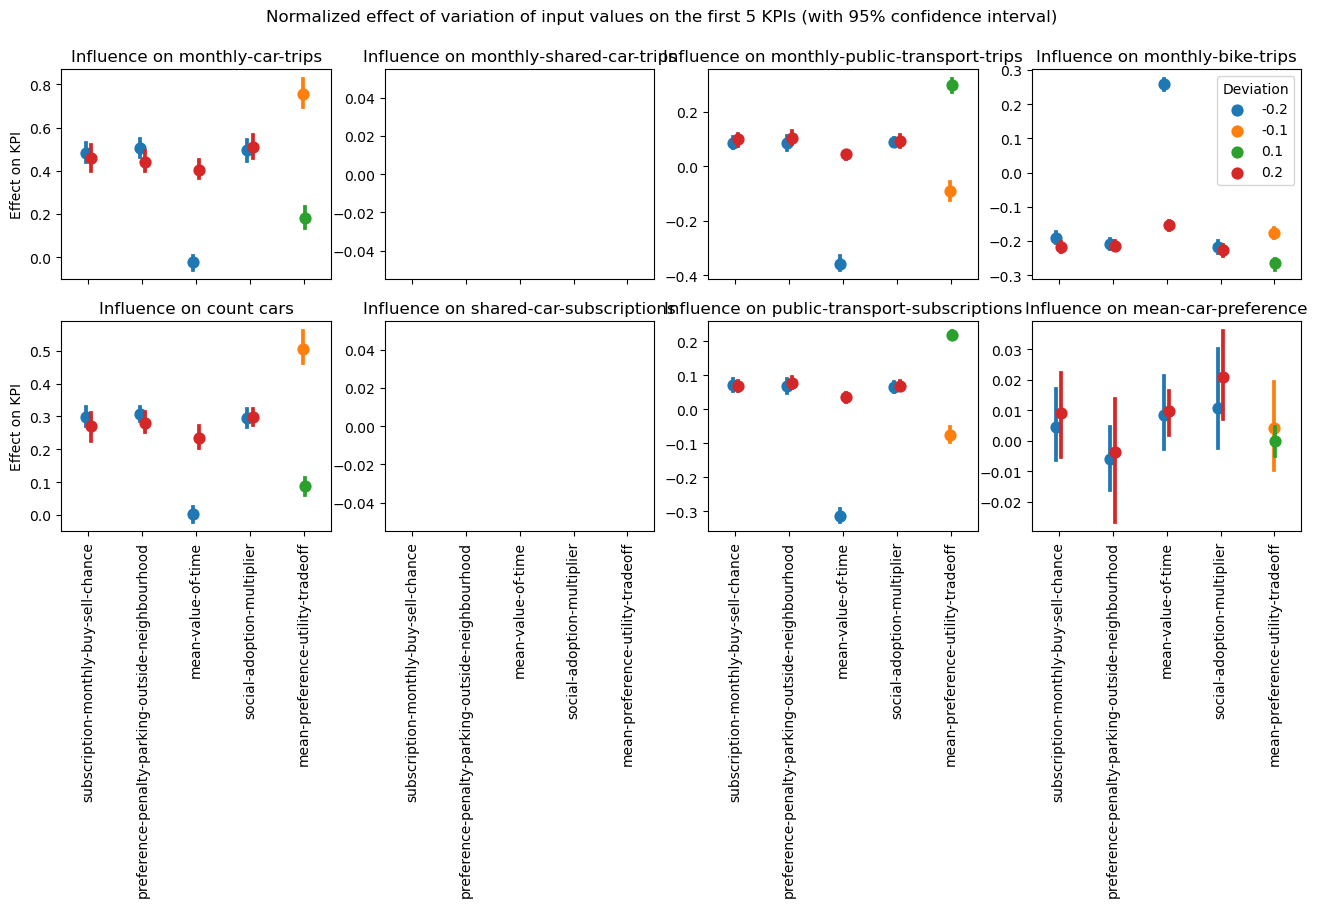

In [17]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(16,6)
sample = None
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[:5] + ["Reference"])].copy()
    df_t["Deviation"] = (df_t["Deviation"] - 1).round(2)
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Deviation", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    if i == 0 or i == 4:
        g[KPI].set_ylabel("Effect on KPI")
    else:
        g[KPI].set_ylabel("")
    # Remove the legend except the fourth plot
    if i != 3:
        g[KPI].legend_.remove()
fig.suptitle("Normalized effect of variation of input values on the first 5 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_norm_1.svg", bbox_inches="tight")

C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bruggeva\anaconda3\envs\ABC\Lib\site-packages\numpy\lib\functio

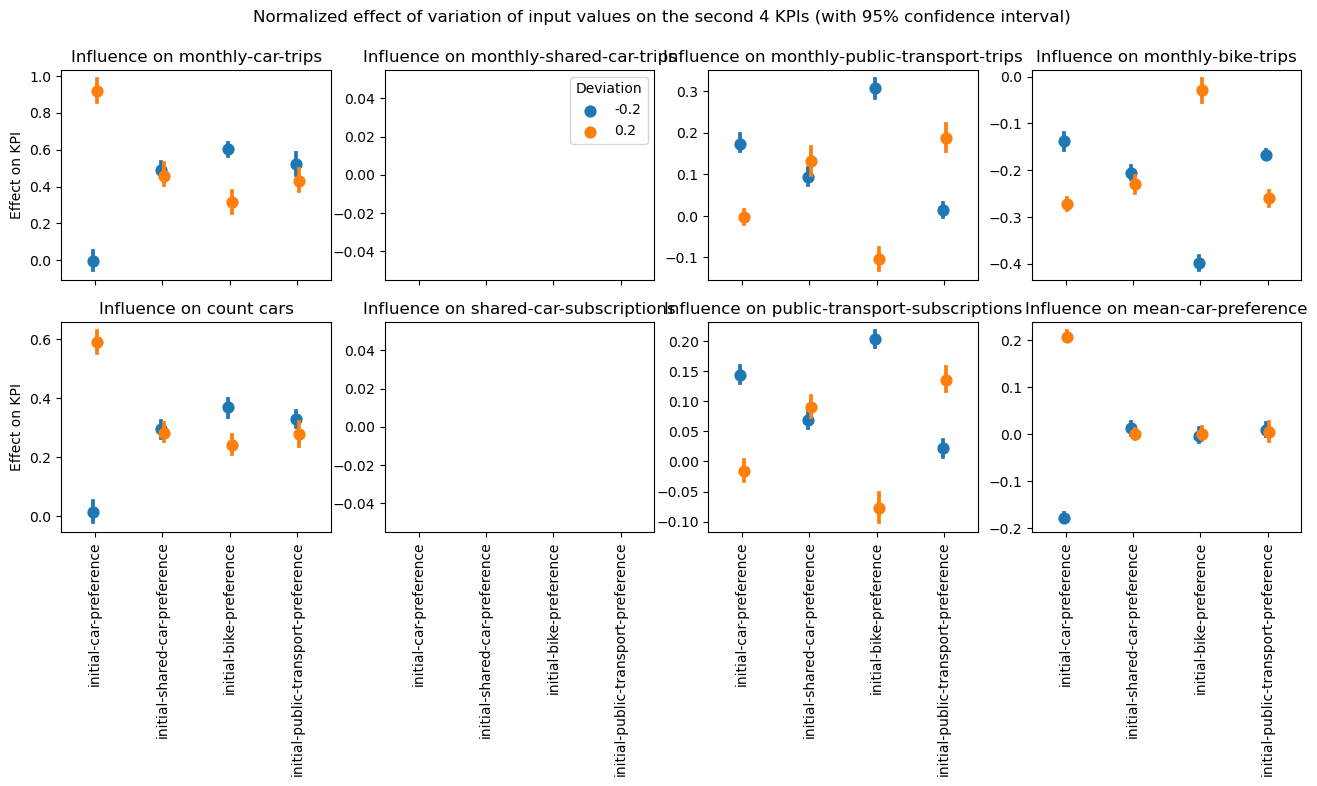

In [18]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(16,6)
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[5:] + ["Reference"])].copy()
    df_t["Deviation"] = (df_t["Deviation"] - 1).round(2)
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Deviation", errorbar=('ci', 95), join=False, dodge=True, label="Result", ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    if i == 0 or i == 4:
        g[KPI].set_ylabel("Effect on KPI")
    else:
        g[KPI].set_ylabel("")
    # Remove the legend except the fourth plot
    if i != 1:
        g[KPI].legend_.remove()
fig.suptitle("Normalized effect of variation of input values on the second 4 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_norm_2.svg", bbox_inches="tight")